# Prediction using Text Data (predict/guess the author of a tweet)
In this section, we will build a model that attempts to predict/guess the author of a tweet.

## 1 Loading your pre-processed data

In [1]:
# Load the modules we will use
import pandas as pd
import scipy
from sklearn.feature_extraction.text import CountVectorizer

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [2]:
# Load the tweets into a DataFrame
alltweets = pd.read_csv('data/alltweets.csv')
print(alltweets.head())
print(alltweets.tail())

   Unnamed: 0                                               text  trump
0           0    Here is my statement.pic.twitter.com/WAZiGoQqMQ      1
1           1  Is this really America? Terrible!pic.twitter.c...      1
2           2  The media and establishment want me out of the...      1
3           3        Certainly has been an interesting 24 hours!      1
4           4  Debate polls look great - thank you!\n#MAGA #A...      1
       Unnamed: 0                                               text  trump
24107        6891       In Indianola, Iowa and heading to Des Moines      0
24108        6892  Thinking we can cut oil consumption by 2.5 mil...      0
24109        6893  At the Detroit Economic Club – Talking about t...      0
24110        6894  Wondering why, four years after President Bush...      0
24111        6895  Thinking we're only one signature away from en...      0


In [3]:
# Load the corpus into a Series
# squeeze = True - ensures the data is a Series
# keep_default_na = False - ensures that there are no 'nan' values imported
corpus = pd.read_csv('data/corpus.csv', squeeze = True, keep_default_na = False)
corpus.head(10)

0                                Here is my statement.
1                    Is this really America? Terrible!
2    The media and establishment want me out of the...
3            Certainly has been an interesting  hours!
4    Debate polls look great - thank you!\n#MAGA #A...
5    WHAT THEY ARE SAYING ABOUT THE CLINTON CAMPAIG...
6                       Thank you! #MAGA #AmericaFirst
7    I will be in Cincinnati, Ohio tomorrow night a...
8    Very little pick-up by the dishonest media of ...
9    Thank you Florida- a MOVEMENT that has never b...
Name: text, dtype: object

In [4]:
# Use the vectoriser to create the feature data 'X', i.e., the bag-of-words, with stop words removed
vect = CountVectorizer(stop_words = 'english')
X = vect.fit_transform(corpus)

## 2 Train a regression model

We start by using the 'alltweets' DataFrame created in the previous section and loaded above.

In [5]:
# Extract the target data (the 'y' variable):
y = alltweets['trump']
print(y.head())
print(y.tail())

0    1
1    1
2    1
3    1
4    1
Name: trump, dtype: int64
24107    0
24108    0
24109    0
24110    0
24111    0
Name: trump, dtype: int64


In [6]:
# Split off some test data to test our model later:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)

In [7]:
# Train a logistic regression model using the training data.
# Because the dataset is not balanced (much fewer Tweets by Obama), set the ‘class_weight’ parameter to ‘balanced’:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', class_weight = "balanced")
log_reg.fit(Xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 3 Understand the model
Examine the predictive power for the words

In [8]:
# Get the list of tokens
feature_names = vect.get_feature_names()
print(feature_names)

['aaa', 'aaanews', 'aandreakis', 'aaszkler', 'ab', 'abandon', 'abandoned', 'abanoubabdel', 'abbeyashir', 'abbott', 'abbottabad', 'abby', 'abbysullz', 'abbywambach', 'abc', 'abcinsc', 'abcnews', 'abcpolitics', 'abcsharktank', 'abcwashington', 'abdeslam', 'abdullah', 'abedin', 'abedini', 'abelerner', 'aberdeen', 'aberdeencc', 'aberdeenshire', 'aberdonian', 'abetterbargain', 'abhor', 'abide', 'ability', 'abimlebt', 'able', 'abnormally', 'aboard', 'abolish', 'abolished', 'abortion', 'abortions', 'abouttherock', 'abraham', 'abridged', 'abroad', 'abrupt', 'absabella', 'absence', 'absentee', 'absolute', 'absoluteicon', 'absolutely', 'absolutism', 'absorb', 'absorbed', 'abstraction', 'abt', 'abu', 'abunnieslife', 'abuse', 'abused', 'abuser', 'abusers', 'abuses', 'abusive', 'abysmal', 'abyss', 'ac', 'aca', 'academic', 'academics', 'academy', 'acaworks', 'accelerate', 'accelerated', 'accentuate', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accesshollywood

The ‘log_reg’ object has an attribute ‘coef_’ which contains a one-dimensional array of the estimated coefficient/parameter/β values for all the feature variables.  Examine these coefficients.

In [9]:
# Examine the coef_ variable
print(log_reg.coef_[0])
print('The coefficients range between: [{} and {}]'.format(log_reg.coef_[0].min(), log_reg.coef_[0].max()))

[ 1.54503145e-01  1.01414371e-01 -5.19049627e-07 ...  2.61195438e-06
  1.44145699e-01  2.73621015e-04]
The coefficients range between: [-3.1379190449411354 and 5.734612433862909]


In [10]:
# We can apply the .argsort() method to the coefficients array.
# This returns an array of the indexes, sorted by coefficient value.   
sorted_coef_index = log_reg.coef_[0].argsort()
print(sorted_coef_index)
print('The first and last items in the list reference the min and max coefficients: [{} and {}]'
      .format(log_reg.coef_[0][sorted_coef_index[0]], log_reg.coef_[0][sorted_coef_index[-1]]))


[  157  1594 11606 ...  9768 15689 12155]
The first and last items in the list reference the min and max coefficients: [-3.1379190449411354 and 5.734612433862909]


In [11]:
# Print the words from the feature names list in order of the sorted list
# So words with the lowest coefficient (i.e., those more likely to be used by Obama) are printed first.
for i in sorted_coef_index:
    print(feature_names[i])

actonclimate
bo
president
romney
sotu
rt
getcovered
progress
dinnerwithbarack
enoughalready
covered
health
retweet
shirt
reps
uswnt
women
et
raisethewage
reform
doyourjob
share
michelleobama
uninsured
deadline
potus
photos
icymi
obligation
ofa
voice
insurance
loveislove
uncertainty
add
grassroots
education
act
voices
summer
demandaction
equality
nationalrunningday
solar
haiti
getcoverednow
grandchildren
thisiswhy
vp
biden
help
compromise
stronger
visit
note
garland
flotus
passing
ending
responsibilities
sticker
daughters
reasons
thedemocrats
bumper
finish
ve
lgbt
immigrationaction
immigrationreform
worked
madeinamerica
news
violence
polluters
haaretz
card
collegeopportunity
step
wedemandavote
secretary
chip
pollution
agreement
irandeal
congress
nation
decide
renewui
workers
hashtags
affordable
actonjobs
organize
happened
congressional
outdoors
town
lady
claim
volunteers
denver
romneyeconomics
opportunityforall
journey
columbus
pull
peace
tell
marchon
meet
families
gulf
moving
smile
hea

forceful
fights
mammograms
buyout
elena
extend
childhood
cheaper
closes
creativity
emergency
op
assist
cfpb
saves
installations
mugs
standwithourfuture
authors
happyhanukkah
hashtag
curtain
carol
costs
listened
attire
compensation
foreclosed
wrongfully
currently
mining
urgent
trailer
stewards
expansion
plutoflyby
nasanewhorizons
traveled
patientsbillofrights
thisisreal
fulfill
mars
kind
completing
podium
sciencesaysso
bark
salute
sotomayor
nc
small
alice
politifact
holidays
ideology
burnett
standwithdreamers
kalamazoo
recipient
common
diego
thekidsneedtoknow
empowered
happyhalloween
dinner
bless
highlights
extreme
storms
teamjoe
state
richardson
chant
eugene
unit
settled
immigration
chu
happening
forms
veteranscantwait
ideals
lands
trumps
canilive
touring
years
justice
coops
chicken
governing
happyholidays
chapter
investments
nytimes
commanders
distinguished
admirals
roe
roads
count
moral
promisekept
questlove
pills
bears
wade
recoveryact
helped
depends
elizabethforma
decade
tilt
inter

bedrock
groundbreaking
thejointstaff
homosexuals
oxford
integrity
foster
cong
dist
personnel
accomplishment
offshore
accident
protected
showing
estherville
algona
emmetsburg
threat
friday
deductions
accounted
unleashing
visions
honorable
neutrality
crises
partners
prevents
breakthrough
consumers
japan
elect
moly
rufusgifford
holy
fellows
effects
cybersecurity
funny
practice
slide
organizers
leahdungan
observe
chili
relive
echo
example
covers
rails
shrunk
rungs
gwenstefani
prohibit
orientation
hopeful
counseling
soaring
spider
flu
cemetery
exist
sales
shattering
thankateacher
tangible
mespeech
member
ongoing
isn
scranton
bloody
oct
homeland
urgency
passthebill
politics
repfrankguinta
repcharlesbass
chicagosmayor
lifehappens
picked
senatemajldr
gridlock
priorities
started
arbitrary
repdennisross
vernbuchanan
conniemackiv
congbillposey
silence
identity
hood
initiative
irresponsible
greatness
counts
ransoms
millionsolarstrong
region
submit
stephon
july
lifesaving
binds
pausing
roadtraveled

bullet
syracuse
onstage
duchess
cambridge
skydiving
georgehwbush
outpaced
wasserman
toxic
safeguards
mercury
thirds
breadwinner
barber
happyinternationalwomensday
debut
books
bristol
symptoms
propose
mayors
happyteacherappreciationday
gatekeepers
quotes
children
takeittothehouse
asegurate
punish
margin
continually
ninth
salon
instagram
rail
shouldering
proposals
upenn
greatertogether
fee
dusting
ash
walks
transformative
budged
fo
absentee
preference
coveramerica
signs
trickled
changer
mentor
providers
discriminate
graduating
concessions
make
chat
recruit
loss
campuses
stark
unchecked
geothermal
gabbygiffords
consequence
contrast
shifting
juncture
letsmove
schultz
internationalwomensday
provisions
legislature
mpg
flint
generating
chairwoman
promiseskept
surrender
prep
recipe
tested
prevailed
premature
magazines
revealing
applied
funke
warms
times
posturing
renouncing
andy
reflect
doubled
input
conscience
voxdotcom
gosolar
gameday
disfunction
matchup
grandparents
shedding
sturdy
visitus


rapid
repjoebarton
gerfingerpoken
mgriffithnyc
repmikepompeo
heightened
rank
repmattsalmon
replynnjenkins
gennifer
politicalticker
ratification
replied
heckler
wdesmoinespatch
repkevinbrady
invaluable
appealed
heavyweight
nathan
heelsgunner
gladly
headway
giantsandles
girardi
ingredients
weighted
repblumenauer
girlfriends
intrests
haunt
giunta
giveaway
michaeljohns
repalannunnelee
gkohlschmidt
initially
reaches
glaciers
weighs
intriguing
anticipate
ginajargirl
politixchick
anxiety
ahatwearer
antonio
aholes
antidote
raul
workout
weeklystandard
prefers
gila
hawks
wegoted
raybongz
raymeem
polled
introduce
applauding
analyzes
whholiday
reaping
hammering
groundhogday
wildmanbs
mygianluca
alvisefranz
instability
redeyefnc
alternatives
redeye
inserts
gsrpygmies
preaches
redefine
redding
ama
install
installation
amadorserver
realnickventi
instantly
instantgourmet
realollietaylor
precipice
minlarrycornel
wishful
guardian
amaninmanhattan
wikipedia
alexmaymcgregor
gritty
groceries
groovyhank
wil


listeners
chugging
ohiovotesearly
lisarinna
lisapetrillo
claymkopplin
literacy
clothed
olympiccommittee
clout
lile
teamamerica
childcare
onmylevellopez
coffin
chick
thechrismcqueen
chezvachon
childishly
teabo
chesterfield
lightmandavid
colinmeeks
tbi
colleague
thedropkicks
cheneys
cheney
tdavistonya
openingday
coastline
lillirome
linflies
omikrondreamer
clubgoers
offend
teasing
tease
clumsy
oneandonlyakash
coastguardday
chipped
lin
teamspringsteen
lilsarg
cntraveler
coached
coachjman
chile
coalcitizens
chipb
kendrickbmeek
swamped
obstinate
outperforming
couric
lubitz
timcoopertweets
courtney
output
couses
outputs
cardin
capturing
cower
stts
laytonjpalmer
timeforrealwork
caprimary
capped
crainsdetroit
coupon
lrihendry
caregiver
lr
carver
cartoons
subvert
leases
carriers
subsequent
outlay
subscribers
timeless
thsnks
lean
carolyngoltman
thy
nyu
ticktock
stvnews
lowers
tidbits
leaping
capitalize
capitalistic
capitalist
critique
timkaine
strategize
crocus
strategists
lupe
crossover
timshurr

suspense
tsheppe
sharpest
michaeljackson
friendlyfriday
renamed
strengthened
bizservicesinc
natswish
heymaccc
okc
becuz
therealdeal
ilenayankoviak
surpasses
calebjofficial
suspicion
marcopolomacon
exceed
realdbp
nojoed
merssem
diapers
acebuey
pawsar
tarrkoziara
revived
captivates
stirring
forwarded
payable
trumphotelcollection
secupp
pics
msfox
reidcindy
prayformetoo
cortneykahrs
random
joshcalebking
playazball
umpirerobert
mailloua
ricolodean
collections
amassing
matteastwood
stepping
leaning
sritacolombia
rips
soweto
rednationrising
ncconserv
usclarry
kaburuole
lil
entreprenuer
pasvote
sheldonadelson
thisthursday
garysinise
snoburd
realjohnanthon
needless
thesportsswede
authored
tomnocera
screams
dominant
boarcane
toypilavzla
emohermione
emblazoned
andyshinberger
initiated
lettyntx
disrupt
mylifeislibby
cos
raw
happiikarii
pauperinapinch
songwriters
nationsl
kaylorcc
tf
trashes
kimberly
toured
unclelouie
mishandled
prisoner
attaanago
philosophies
schooler
jeffferrier
federicishane
mm

mrsilverscott
jskibler
mrdrewscott
wallflower
cling
troll
backupwraith
bore
berniesandner
toaster
mrsmikehoover
contributed
ryanseanheron
bradangsa
greaseweezer
scape
panicked
goat
appreciative
commanding
dragged
leebandoni
osamabinballinn
anticlimax
lorenzo
enabled
andybran
getkraven
demorats
haroldrschmidt
yep
liquidating
mercer
holdings
buckybirt
lifestyles
fountain
riannarichards
opinionated
wooed
woo
quickerwit
mondays
elites
raddmom
businessgenius
coating
joshburrnett
davis
lectured
belts
tightening
bashes
rejuvenate
wny
andrewzufel
dleonaard
overrun
lierlier
tweetthetruth
pherreroraphael
mzinvestigator
codes
tmoody
yournotfired
niyafiya
kwrcrow
caudillash
americanowradio
solyndras
whistleblower
imdruchainz
tolerate
johnrmccabe
unusually
cps
ac
bldgs
recuperating
chelseaclinton
joenbc
leary
televised
burnt
keepingitreal
maintains
aronsarmy
hpw
purplite
lspaggs
sliwa
fireflyfury
ericxmorrison
hoppmar
billdabeastii
tourney
tiffanypearls
cancelingmycard
jealousy
zarkriggs
agaiin
aba

vulgar
mrctv
suggestive
citation
cheezitscat
georgewillf
youkilis
mode
transport
jameshohmann
jahbalon
decorated
favorites
valerieannt
allenwronowski
nonexistent
atroxell
portfolio
linkedin
whartonmagazine
backers
newsfeed
alright
assaulted
buddholly
trumpfan
rapper
baier
owebumma
hides
noturbine
bbc
shoddy
reveal
nickbeii
thecarlossegura
lettermans
unpredictable
cities
hargraveglobal
beast
mastermind
livnow
foresight
authorized
carterdekeyser
persuading
mexicoindie
inflammatory
tone
carolde
nowadays
msmegzilla
alphainparis
iamgavinjames
suburbs
philly
gopthinker
lmao
kerricj
teen
priest
rationally
listing
highlight
lawlessness
pleaserun
theprimehost
vacuuming
wallets
thats
cpacdean
zankmatt
kylekisskiss
forgive
alexrasey
shalontabowman
spencerpyoung
recommend
distrbution
ints
corrupted
threw
overboard
lodha
mysticmimsy
javamedic
gusto
tcompletely
slanted
col
adversaries
peters
screws
humanevents
mumbai
tenures
shortest
grabs
kuwait
hows
scienceinvestme
luisaorozcov
stephenbaldwin
bald

classic
nowthatouimet
insecure
adm
dynasties
corrections
li
petedicenso
wrecking
laclippers
doc
kinkade
paintings
nastiest
unanimously
tonylarussa
managers
cox
behaving
cameraman
assemble
lows
mikem
summary
smartest
selfishly
freedomhaawk
rearrange
kaymer
extravagantly
separately
lodge
fraternal
indonesia
renewable
orator
giatny
visa
residences
kwanza
framework
missmakeupmogul
scrutiny
phantom
destabalize
deviant
section
fudged
subscriptions
nuking
dannyzucker
suppress
despair
classy
attraction
chuckwoolery
actively
lame
mayweatherpacquiao
aleksmm
justinjgraff
pleasegetfired
mouthpiece
bushy
robertson
diplomatic
narrative
damaging
spin
intheelections
elvisfever
baited
costareports
gig
informs
theater
berghdal
someasianchick
nets
pareene
goldenglobe
prochekhomeinsp
circuited
texans
hilaryclinton
michaelledeitri
examples
repchriscollins
bowls
huandarulz
bjseastoneamp
politicalcrap
reveals
rustyrockets
influential
overflowing
showdown
triumphs
domination
inboxleekersey
lolo
followlolo
vir

recognition
silverfoxgranny
saudiarabia
projections
microphone
eviscerated
deflect
virus
speakerryan
homage
magnificently
refutation
tomtumillo
screaming
meyers
captured
fled
blaze
reinosooo
tournaments
sole
reason
cameron
pounds
carlos
outsourced
seldom
kgb
harassment
placeholder
jeopardize
solo
gretchen
carlson
smarkelon
malta
whetted
appetite
eraser
strokes
sunset
whitneykray
doping
rapists
mary
rocket
triple
joyvbehar
dade
conclusively
tcufootball
texastech
smack
jaw
ghettofabulous
cspanpolitics
dumpmacys
clifton
snd
dealmaking
cajole
embarrass
canard
condo
manila
lightbulbs
tearing
vehemently
opener
reception
kansas
wheeling
enrollees
crowned
pleading
tyrone
cabanas
governors
mayhem
quarantines
emotion
ii
signal
positives
vision
geneva
switzerland
jordanspieth
remodeled
commentary
algae
burials
aswoyer
pledges
airbus
conquered
gutted
hemisphere
robertundefined
rikemohome
overwhelmed
tortured
destructive
leak
boycottmacys
fred
breitbart
networks
esquire
doonbeg
unified
internal
rob

barricade
retail
mall
manipulating
tonights
classified
sensitive
seasons
glory
cnni
blackish
whiteish
furor
plastic
jonkarl
counselor
practicing
reconsider
skyrocket
frantically
outside
fleet
rag
beneficiary
harris
aggravation
thebingle
thoughts
legend
inoculations
visibly
congrat
opportunity
tremendously
shrug
vintagesmitty
astros
impression
reppaulryan
squawkcnbc
celebrities
embarrasses
accepting
exxon
cnnpolitics
burdens
regulatory
facet
jackshallis
mixed
triky
slippery
awarded
lone
racism
softly
unforgivable
hagan
oskaloosa
guidelines
poison
schopenhauer
visas
svingali
theratzpack
jumps
obama
afghanistant
palestinians
glamour
competence
tarekr
latshowtracker
apprenticenbcon
awake
viewed
ridiculousness
vindicate
aews
taxpayer
overruns
seeks
fit
intention
radicals
gifts
plays
ladykellliberty
pburgh
founder
comfortable
nukes
bluffs
woke
dud
root
pardon
sheldon
litigate
exonerated
setup
miscarriage
bella
recovering
straw
morningsideedu
clovis
sensational
illustrative
dolefoundation
hid

arseniohall
vampire
blogger
grammar
sleeping
recycled
pill
martial
interrogation
idol
ado
fannie
freddie
hannityshow
forgot
momentum
playmate
acknowledge
assessment
tornadoes
stevemtalk
tonytuanvu
admitted
declaration
brolin
karatemomccm
jlogossocomedy
robertaritzen
fault
october
doomsdayfan
makeamericangreatagain
domestically
interiors
walled
trendiest
loft
feeling
muslims
columbia
climb
libertyuniversity
citadelgop
senatortimscott
theslystallone
durst
enforcement
brandon
sellassellas
voluntarily
animals
deportations
decaying
replay
escape
institute
exercised
fascinating
dailycaller
hadn
unused
walls
watching
collect
brutally
scent
lasts
obtained
delusion
wolves
abhor
gaillorene
stricken
justrelaxfornow
yearns
munich
ruins
punch
borderless
usarestoring
toast
finger
glennbeck
tgowdysc
broader
reelection
runway
publicize
plummeting
disciplined
mindset
biggovt
deported
signature
affairs
envied
disappear
crap
hackers
pretending
donaldtrumpfink
huff
supersaturday
vick
fortworthpd
michele
b

renaissance
lesm
monitor
borscht
vodka
tune
disbelief
stays
fist
frivolous
paperwork
applies
haphazard
anticipated
accept
islamist
tuitions
managing
maxinerunner
confronted
restricted
ration
clownstick
von
kface
guard
bravoandy
mt
hshoyeb
successes
comm
drug
crumble
romneycare
darth
vader
person
proposed
maria
burying
surface
bowe
blindly
andersoncooper
skilled
heartbreaking
economically
governorperry
appointments
setbacks
theregister
princebe
shelf
eroding
antarctic
lindsey
film
spiked
seizures
deadly
kathryn
coined
pls
intensity
lauderdale
crosses
danamira
nydailynews
protesting
hostile
kluge
excessive
pr
heisman
sympathy
exposing
grandchild
cooked
backed
canceled
waterfall
testament
leezeldin
intent
troymeaz
publicity
stephen
ralphreed
shelves
holly
thatcher
ogilvy
utility
voter
trend
cbsnews
mandarin
thursdays
platform
letting
abolish
embraced
sleazebags
corygardner
udall
coloradans
corrupt
expo
wtf
asses
dallasmavs
armedforcesday
distributed
jenniferalarson
touristinmyownbackyard


cuomo
geraldorivera
criticize
ruling
adamcarolla
moss
commodity
lookout
tsarnaev
dark
mikeliberation
boy
causing
unknowingly
outsourcing
begged
learning
lol
pasteur
goods
point
kdawnpatterson
row
pollitically
binding
sentence
johnny
randy
option
activities
trumpative
barnesandnoble
multi
alison
grimes
exact
comic
ing
making
anti
ignored
kidding
guests
hired
brutal
berlin
beats
opposes
carried
rihanna
chrisbrown
courses
oars
proverb
encourage
colby
cforcolby
panels
laredo
complacent
admitting
ribbon
attacked
chooses
caucusfortrump
accountability
spoken
lou
chelseahandler
nonwork
subsidizes
mets
engagement
wintour
love
sidewalks
sony
agriculture
anthonyweiner
tmz
burnerirons
trumpgolf
groveling
cohen
hero
gallon
sexting
hawaii
charitable
revise
irrelevant
europeans
annabelkarmel
akmumpreneur
resorts
sanctity
insanity
slumpcityusa
comes
relaxes
sustainability
personally
warrenbuffett
formidable
wanting
simultaneously
fran
optimal
joedurak
represents
com
windfarm
iraelis
nyjets
controlling

impeach
seriously
renovated
wollman
workforce
knowingly
gas
national
rags
therealkiyosaki
bonus
informative
rapidly
unemployment
golfing
rink
peaks
valleys
restaurant
topic
recieved
touching
defeated
start
sleazebag
peale
vincent
jet
capital
large
fixed
cheated
email
don
itisjohndoe
thugs
billcassidy
employed
embassy
cohesivness
chuck
woody
manti
tourist
sam
monopoly
iacaucus
christians
olympic
retrospect
jerry
trumpgolfla
life
turmoil
easily
management
size
form
incapable
maxmacgruder
rand
winners
met
granted
kobe
nash
drawing
specialreport
center
stuartpstevens
merger
karzai
presidential
accrued
prior
italy
freezing
starting
uses
nafta
allowing
tip
goldwyn
statement
celebrations
strike
thehill
tenacious
lessons
israeli
madness
granting
thx
te
nato
filed
rockefeller
schneiderman
moves
hi
bergdahl
purchasing
political
trumptrain
nondefense
scandal
coast
tread
howardstern
buildings
faster
canada
crowds
proving
apologize
slow
substantially
use
phony
int
dopes
stevekingia
arrived
chairman

problem
tzu
elected
column
control
success
killing
thursday
celebrityapprentice
reporter
john
anymore
running
saying
zero
albert
pageant
pm
jack
mark
rod
erictrump
alexsalmond
wants
jeb
einstein
taliban
didn
questions
request
military
henry
dumbest
dishonest
ted
korea
spent
numbers
fiscal
article
franklin
autism
missusa
lose
destroyed
melaniatrump
thank
money
ridiculous
enemies
oreillyfactor
negotiation
weak
deals
art
weakness
trouble
correct
truly
scotland
wwehof
worse
does
soon
truth
mexico
followers
congratulations
jewish
buy
press
missuniverse
syria
wins
bernie
billmaher
spends
opec
snowden
mr
cover
successful
chinese
pres
ivankatrump
killed
jimmy
really
trumpdoral
defund
losers
vpdebate
isis
lie
monday
libya
bush
losing
tremendous
putin
vacation
ebola
released
immediately
vets
focus
george
bad
trumpvlog
amnesty
prices
rosie
stupid
book
careful
smart
fast
borders
horrible
yankees
cruz
glad
politicians
interview
fantastic
ratings
sadly
think
poll
sorry
benghazi
illegal
border
tweeti

In [12]:
# Or using list comprehension:
# Print the words that are likely to be Barack Obama (low values of coef index)
[ feature_names[i] for i in sorted_coef_index[:30] ]

['actonclimate',
 'bo',
 'president',
 'romney',
 'sotu',
 'rt',
 'getcovered',
 'progress',
 'dinnerwithbarack',
 'enoughalready',
 'covered',
 'health',
 'retweet',
 'shirt',
 'reps',
 'uswnt',
 'women',
 'et',
 'raisethewage',
 'reform',
 'doyourjob',
 'share',
 'michelleobama',
 'uninsured',
 'deadline',
 'potus',
 'photos',
 'icymi',
 'obligation',
 'ofa']

In [13]:
# Print the words that are likely to be Donald Trump (high values of coef index)
[ feature_names[i] for i in sorted_coef_index[-30:] ]

['nice',
 'fox',
 'website',
 'incompetent',
 'apprenticenbc',
 'enjoy',
 'donald',
 'apprentice',
 'china',
 'run',
 'true',
 'timetogettough',
 'foxnews',
 'totally',
 'disaster',
 'celebapprentice',
 'great',
 'interesting',
 'entrepreneurs',
 'hillary',
 'worst',
 'charity',
 'donaldtrump',
 'terrible',
 'makeamericagreatagain',
 'cont',
 'barackobama',
 'mittromney',
 'trump',
 'realdonaldtrump']

Why are these words different from the ones shown in the word clouds?

## 4 Test the regression model


In [14]:
# Test the model on the Tweets we looked at earlier:
tweet1 = "We are building the wall..."
tweet2 = "The Wall is being rapidly built! The Economy is GREAT! Our Country is Respected again!"

# Create a BOW from the tweets
test_tweets = [tweet1, tweet2]
test_tweets_vectorised = vect.transform(test_tweets)

print('(row,  col) count')
print(test_tweets_vectorised)

(row,  col) count
  (0, 1951)	1
  (0, 16468)	1
  (1, 1955)	1
  (1, 3274)	1
  (1, 4610)	1
  (1, 6367)	1
  (1, 12073)	1
  (1, 12637)	1
  (1, 16468)	1


In [15]:
# Understand this sparce matrix 
print('rows = {}'.format(test_tweets_vectorised.indptr))
print('pointers = {}'.format(test_tweets_vectorised.indices))
print('counts = {}'.format(test_tweets_vectorised.data))

rows = [0 2 9]
pointers = [ 1951 16468  1955  3274  4610  6367 12073 12637 16468]
counts = [1 1 1 1 1 1 1 1 1]


In [16]:
# Some words were dropped (not in the BOW)
# Display which words were actually vectorised
for i in test_tweets_vectorised.indices:
    print('Get word {0:6} from the bow: {1}'.format(i, feature_names[i]))

Get word   1951 from the bow: building
Get word  16468 from the bow: wall
Get word   1955 from the bow: built
Get word   3274 from the bow: country
Get word   4610 from the bow: economy
Get word   6367 from the bow: great
Get word  12073 from the bow: rapidly
Get word  12637 from the bow: respected
Get word  16468 from the bow: wall


In [17]:
# Predict who wrote the tweet and output an array with items as follows
# Tweet 1: 1 if Trump, 0 if Obama
# Tweet 2: 1 if Trump, 0 if Obama
log_reg.predict(test_tweets_vectorised)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([0, 1], dtype=int64)

In [18]:
# Report the estimated probability that each Tweet was made by Obama (Po) or Trump (Pt)?
# Tweet 1 [Po, Pt]
# Tweet 2 [Po, Pt]
log_reg.predict_proba(test_tweets_vectorised)

array([[0.54960108, 0.45039892],
       [0.1258029 , 0.8741971 ]])

In [19]:
# Test the model on some Tweets:
# Tweet 1: 1 if Trump, 0 if Obama
# Tweet 2: 1 if Trump, 0 if Obama
# ...
test_tweets = [
    'mexican border wall',
    'maga',
    'crooked hillary',
    'equality'
]

test_tweets_vectorised = vect.transform(test_tweets)

In [20]:
# Predict who wrote the tweet and output an array with items as follows
# Tweet 1: 1 if Trump, 0 if Obama
# Tweet 2: 1 if Trump, 0 if Obama
# ...
log_reg.predict(test_tweets_vectorised)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([1, 1, 1, 0], dtype=int64)

In [21]:
# What is the estimated probability that each Tweet was made by Obama (Po) or Trump (Pt)?
# Tweet 1 [Po, Pt]
# Tweet 2 [Po, Pt]
# ...
log_reg.predict_proba(test_tweets_vectorised)

array([[0.0776459 , 0.9223541 ],
       [0.32479122, 0.67520878],
       [0.03929637, 0.96070363],
       [0.80863834, 0.19136166]])

## 5 Score the model
The accuracy of the model can be scored for the training set and for the test set.  
  
The model will usually score higher for the training set, because this is what was used to train the model.

In [22]:
# Evaluate the model:
log_reg.score(Xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


0.9842955098429551

In [23]:
log_reg.score(Xtest, ytest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


0.9487392169873922

## 6 Evaluate the model using a confusion matrix
A confusion matrix for a binary classifier (i.e., the classifier we've created) is a 2x2 matrix that shows the results achieved using the classifier on a set of data.  The matrix uses the following structure:

```              Predicted
               No          Yes
         ----------------------------
         No  | True        False        
             | Negative    Positive 
 Actual      | 
         Yes | False       True       
             | Positive    Positive
```

If we define a Trump tweet as a "positive", then these four cells are defined as follows:
- True Negatives (TN): We predicted an Obama tweet (i.e. result = 0), and we are correct.
- True Positives (TP): We predicted a Trump tweet (i.e. result = 1), and we are correct.
- False Positives (FP): We predicted a Trump tweet, but it was really an Obama tweet .
- False Negatives (FN): We predicted an Obama tweet, but it was really a Trump tweet.

If the binary classifier is looking to predict the presence of a condition (i.e., a disease), then a False Positve is known as a "Type I error" and a False Negative is also known as a "Type II error".

In [24]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
ytest_preds = log_reg.predict(Xtest)
confusion = confusion_matrix(ytest, ytest_preds)
print(confusion)


[[1597  101]
 [ 208 4122]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 42.0, 'Predicted')

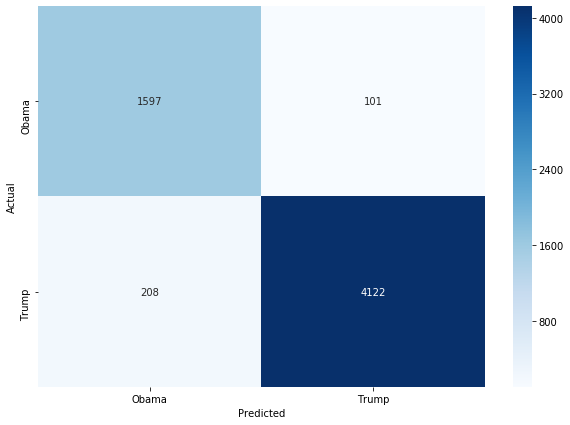

In [25]:
# Create a heatmap of the confusion matrix:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,7))

sns.heatmap(confusion, annot=True, fmt = 'd' , cmap = 'Blues',
            xticklabels = ['Obama', 'Trump'],
            yticklabels = ['Obama', 'Trump'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

## 7 Evaluate the model using a classification report
You can also evaluate the model using a classification report that is generated as below.

For more information, go to:
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report

In [26]:
# Obtain some precision metrics:
# "precision" is the ability of the classifier not to label as positive a sample that is negative
# "recall" is the ability of the classifier to find all the positive samples
# 
from sklearn.metrics import classification_report
print(classification_report(ytest, ytest_preds))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1698
           1       0.98      0.95      0.96      4330

    accuracy                           0.95      6028
   macro avg       0.93      0.95      0.94      6028
weighted avg       0.95      0.95      0.95      6028

